In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
df1=pd.read_csv('Iot Network Intrusion Dataset.csv')
df1.head()       

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [36]:
final_data1 = df1.loc[:, ['Src_IP','Dst_IP', 'Protocol', 'Flow_Duration', 'TotLen_Fwd_Pkts','TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std','Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'ACK_Flag_Cnt','Label']]

final_data1.shape

(625783, 16)

In [37]:
final_data1['Label'] = final_data1['Label'].apply(lambda x: 1 if x == 'Anomaly' else 0)
final_data1.head()
jumbled_data = final_data1.sample(frac=1, random_state=42)
new_data= jumbled_data.head(30000)
new_data.head()



,Src_IP,Dst_IP,Protocol,Flow_Duration,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,ACK_Flag_Cnt,Label
197680,192.168.0.13,40.100.49.34,6,166,0.0,7031.0,0.0,0.0,1004.428571,607.706579,4.235542e+07,60240.963855,18.444444,24.648079,1,1
434844,192.168.0.24,210.89.164.90,17,110,32.0,32.0,32.0,0.0,32.000000,0.000000,5.818182e+05,18181.818182,110.000000,0.000000,0,1
444688,192.168.0.13,210.89.164.90,17,167,32.0,32.0,32.0,0.0,32.000000,0.000000,3.832335e+05,11976.047904,167.000000,0.000000,0,1
593641,192.168.0.13,192.168.0.16,17,122,1430.0,1430.0,1430.0,0.0,1430.000000,0.000000,2.344262e+07,16393.442623,122.000000,0.000000,0,1
157055,104.118.134.215,192.168.0.24,6,175,1441.0,1441.0,1441.0,0.0,1441.000000,0.000000,1.646857e+07,11428.571429,175.000000,0.000000,1,1


In [38]:
df2=pd.read_csv('HPdata.pcap_Flow.csv')
df2.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-172.27.34.195-80-61386-6,172.27.34.195,61386,172.17.0.2,80,6,09-11-2023 09:08,359,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
1,172.17.0.2-172.27.32.208-80-61024-6,172.27.32.208,61024,172.17.0.2,80,6,09-11-2023 09:09,291966,2,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
2,172.17.0.2-172.27.32.208-80-62058-6,172.27.32.208,62058,172.17.0.2,80,6,09-11-2023 09:09,6047003,2,5,...,0,14876.0,0.0,14876.0,14876.0,6029906.0,0.0,6029906.0,6029906.0,No Label
3,172.17.0.2-172.27.32.208-80-62058-6,172.27.32.208,62058,172.17.0.2,80,6,09-11-2023 09:09,13165,2,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label
4,172.17.0.2-172.27.32.208-80-62059-6,172.27.32.208,62059,172.17.0.2,80,6,09-11-2023 09:09,21999,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Label


In [39]:
df2.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [40]:
final_data2 = df2.loc[:, [ 'Src IP', 'Dst IP', 'Protocol','Flow Duration', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',  'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Mean','Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean','Flow IAT Std',  'ACK Flag Cnt','Label']]

final_data2.head()
print(final_data2.shape)

(24045, 16)


In [41]:
final_data2['Label'] = final_data2['Label'].replace('No Label', 0)
final_data2.head()


,Src IP,Dst IP,Protocol,Flow Duration,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,ACK Flag Cnt,Label
0,172.27.34.195,172.17.0.2,6,359,0,0,0.0,0.000000,0.0,0.000000,0.000000,5571.030641,359.000,0.000000e+00,1,0
1,172.27.32.208,172.17.0.2,6,291966,0,0,0.0,0.000000,0.0,0.000000,0.000000,13.700225,97322.000,1.308368e+05,0,0
2,172.27.32.208,172.17.0.2,6,6047003,18,126,9.0,12.727922,25.2,45.991304,23.813449,1.157598,1007833.833,2.460310e+06,0,0
3,172.27.32.208,172.17.0.2,6,13165,0,0,0.0,0.000000,0.0,0.000000,0.000000,227.876946,6582.500,9.289262e+03,1,0
4,172.27.32.208,172.17.0.2,6,21999,22,155,11.0,15.556349,31.0,60.266077,8045.820265,318.196282,3666.500,8.080780e+03,0,0


In [42]:
final_data2.shape

(625783, 16)

In [47]:

combined_data = pd.merge(new_data, final_data2,how='inner', right_on=['Src IP', 'Dst IP', 'Protocol','Flow Duration', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',  'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Mean','Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean','Flow IAT Std',  'ACK Flag Cnt','Label'], left_on= ['Src_IP','Dst_IP', 'Protocol', 'Flow_Duration', 'TotLen_Fwd_Pkts','TotLen_Bwd_Pkts','Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std','Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'ACK_Flag_Cnt','Label'], suffixes=('_new_data', '_final_data2'))
combined_data.head()


,Src_IP,Dst_IP,Protocol,Flow_Duration,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,...,TotLen Bwd Pkts,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,ACK Flag Cnt


In [23]:
missing_values = combined_data.isnull().sum()
np.isfinite(combined_data.all())
nan_values = combined_data.isnull().sum()
print(nan_values)
# print(missing_values)

Src_IP              24045
Dst_IP              24045
Protocol                0
Flow_Duration       24045
TotLen_Fwd_Pkts     24045
Fwd_Pkt_Len_Mean    24045
Fwd_Pkt_Len_Std     24045
Bwd_Pkt_Len_Mean    24045
Bwd_Pkt_Len_Std     24045
Flow_Byts/s         24045
Flow_Pkts/s         24045
Flow_IAT_Mean       24045
Flow_IAT_Std        24045
ACK_Flag_Cnt        24045
Label                   0
Src Port            30000
Dst IP              30000
Dst Port            30000
Flow Duration       30000
TotLen Fwd Pkts     30000
TotLen Bwd Pkts     30000
Fwd Pkt Len Mean    30000
Fwd Pkt Len Std     30000
Bwd Pkt Len Mean    30000
Bwd Pkt Len Std     30000
Flow Byts/s         30000
Flow Pkts/s         30000
Flow IAT Mean       30000
Flow IAT Std        30000
ACK Flag Cnt        30000
dtype: int64


In [54]:
final_data2.columns = ['Src_IP', 'Dst_IP', 'Protocol', 'Flow_Duration', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'ACK_Flag_Cnt', 'Label']

In [57]:
final_data2.shape

(24045, 16)

In [70]:
tour=[new_data,final_data2]
final_evaluation=pd.concat(tour)
final_evaluation.drop(['Src_IP', 'Dst_IP'], axis=1, inplace=True)
final_evaluation.shape


(54045, 14)

In [71]:
flow_bytes = final_evaluation['Flow_Byts/s']
flow_bytes.max() 
flow_packets = final_evaluation['Flow_Pkts/s']
flow_packets.max()

final_evaluation['Flow_Pkts/s'].replace([np.inf], 1e16, inplace=True)    
final_evaluation['Flow_Byts/s'].replace([np.inf], 1e16, inplace=True)

In [72]:
# Check for missing values
print(final_evaluation.isnull().sum())

Protocol            0
Flow_Duration       0
TotLen_Fwd_Pkts     0
TotLen_Bwd_Pkts     0
Fwd_Pkt_Len_Mean    0
Fwd_Pkt_Len_Std     0
Bwd_Pkt_Len_Mean    0
Bwd_Pkt_Len_Std     0
Flow_Byts/s         0
Flow_Pkts/s         0
Flow_IAT_Mean       0
Flow_IAT_Std        0
ACK_Flag_Cnt        0
Label               0
dtype: int64


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Split the data into features (X) and target variable (y)
X = final_evaluation.drop('Label', axis=1)
y = final_evaluation['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



Accuracy: 0.8482089994079337
Confusion Matrix:
[[6105  413]
 [1638 5356]]


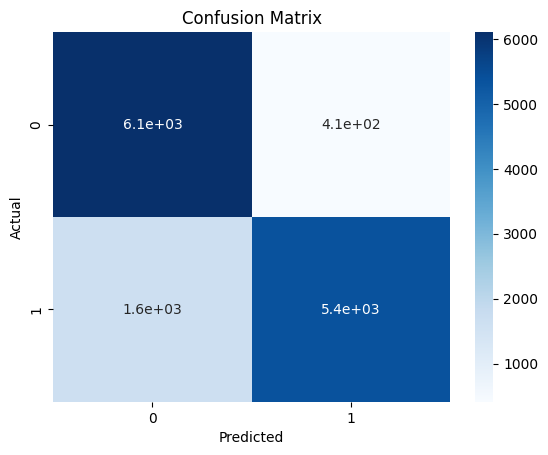

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

bernoulli_nb = BernoulliNB()

# Train the classifier on the training data
bernoulli_nb.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = bernoulli_nb.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
